In [1]:
import numpy as np
import scipy.io.wavfile as wavfile
import scipy.signal as signal

# Load the audio file

In [2]:
import os

# Set the path of the file
file_path = r'H:\matlab_tasks\new.wav'

# Check if the file exists
if os.path.isfile(file_path):
    # Read the audio file
    fs, s = wavfile.read(file_path)

    # Display information about the audio file
    print('File selected:', file_path)
    print('Sampling frequency:', fs, 'Hz')
    print('Duration:', len(s)/fs, 'seconds')
else:
    print('File not found at:', file_path)

File selected: H:\matlab_tasks\new.wav
Sampling frequency: 48000 Hz
Duration: 7.84 seconds


# Define analysis parameters

In [3]:
N = 1000 # FFT size
M = 1000 # Window size
win = signal.hamming(M) # Analysis window
L = len(s) # Length of speech signal
n = np.arange(0, L - M + 1, M) # Starting indices of analysis windows

# Initialize output signal

In [4]:
s_mod = np.zeros_like(s)
w = signal.hamming(N)

In [5]:
for i in range(len(n)):
    # Extract current analysis window
    s_win = s[n[i]:n[i] + M]

    # Apply analysis window
    s_win = s_win * win

    # Compute magnitude spectrum of windowed signal
    P = np.abs(np.fft.fft(s_win, N)) ** 2 / N

    # Modify spectrum to enhance speech quality
    # TODO: Modify P to enhance speech quality by modifying its spectrum

    # Synthesize modified speech signal
    s_mod_win = np.real(np.fft.ifft(np.sqrt(P) * np.exp(1j * np.angle(np.fft.fft(s_win, N)))))

    # Apply synthesis window
    s_mod_win *= win

    # Add windowed, synthesized speech to output signal
    s_mod[n[i]:n[i] + M] = (s_mod[n[i]:n[i] + M].astype(np.float64) + s_mod_win).astype(np.int16)


# Plot the input speech signal, analysis and synthesis windows, and output speech signal

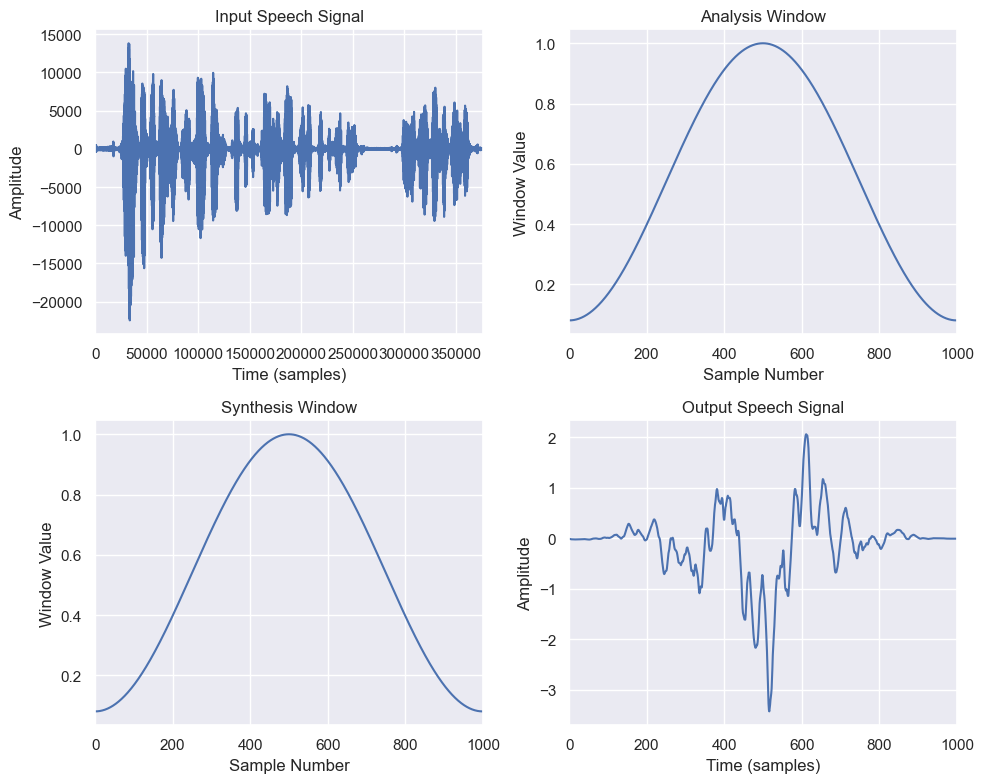

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plot the input speech signal, analysis and synthesis windows, and output speech signal
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].plot(s)
axs[0, 0].set_title('Input Speech Signal')
axs[0, 0].set_xlabel('Time (samples)')
axs[0, 0].set_ylabel('Amplitude')
axs[0, 0].set_xlim([0, len(s)])

axs[0, 1].plot(win)
axs[0, 1].set_title('Analysis Window')
axs[0, 1].set_xlabel('Sample Number')
axs[0, 1].set_ylabel('Window Value')
axs[0, 1].set_xlim([0, M])

axs[1, 0].plot(w)
axs[1, 0].set_title('Synthesis Window')
axs[1, 0].set_xlabel('Sample Number')
axs[1, 0].set_ylabel('Window Value')
axs[1, 0].set_xlim([0, N])

axs[1, 1].plot(s_mod_win)
axs[1, 1].set_title('Output Speech Signal')
axs[1, 1].set_xlabel('Time (samples)')
axs[1, 1].set_ylabel('Amplitude')
axs[1, 1].set_xlim([0, len(s_mod_win)])

plt.tight_layout()
plt.show()

# Normalize output signal

In [7]:
s_mod = s_mod / np.max(np.abs(s_mod))

# Write output signal to file

In [8]:
wavfile.write('speech_signal_mod_new.wav', fs, s_mod)

# Load the modified speech signal from the file

In [9]:
fs, s_mod = wavfile.read('speech_signal_mod_new.wav')

# Plot the modified speech signal

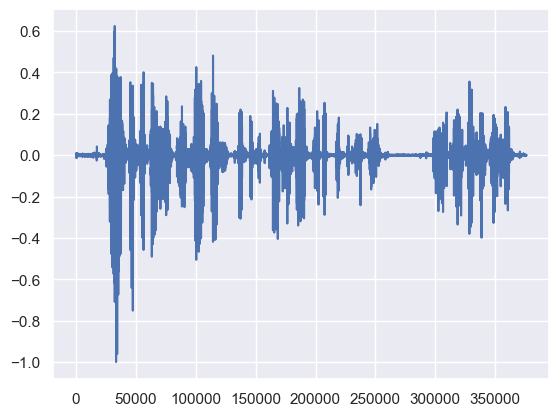

In [10]:

plt.figure()
plt.plot(s_mod)

In [11]:
# Compute the power of the original speech signal
s_pow = np.mean(s**2)

# Compute the power of the difference between the original and modified speech signals
diff_pow = np.mean((s - s_mod)**2)

# Compute the SNR in dB
snr = 10 * np.log10(s_pow / diff_pow)

# Display the SNR
print(f"SNR: {snr:.2f} dB")


SNR: -31.85 dB


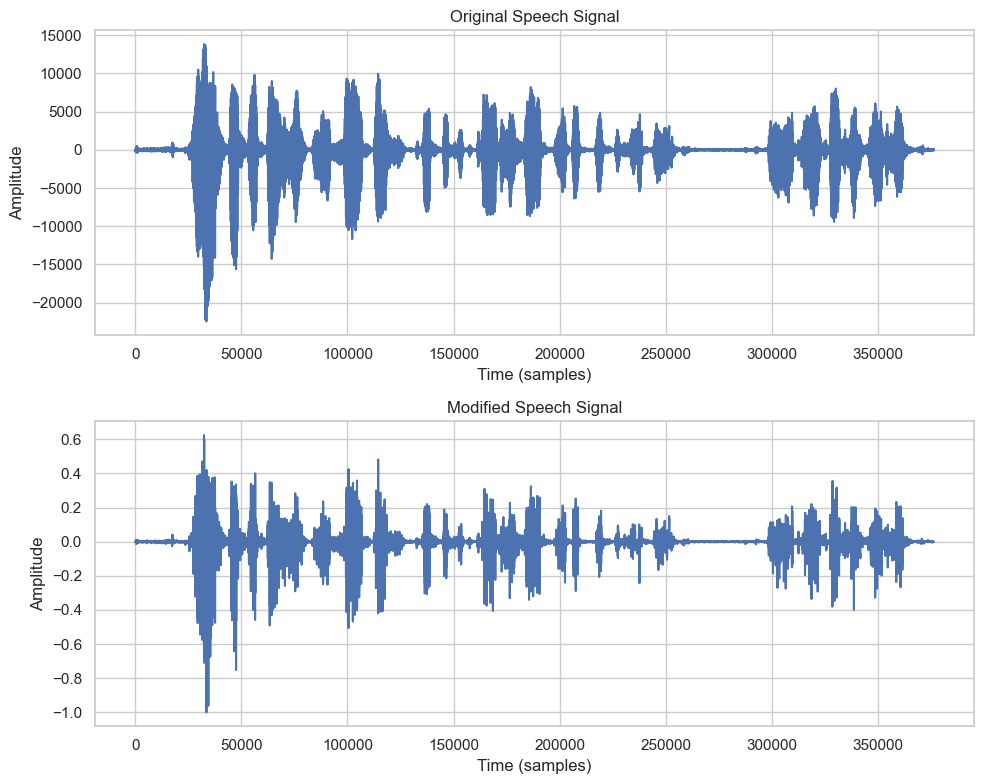

In [12]:

# Plot original and modified speech signals
sns.set_style("whitegrid")
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
axs[0].plot(s)
axs[0].set_title("Original Speech Signal")
axs[0].set_xlabel("Time (samples)")
axs[0].set_ylabel("Amplitude")
axs[1].plot(s_mod)
axs[1].set_title("Modified Speech Signal")
axs[1].set_xlabel("Time (samples)")
axs[1].set_ylabel("Amplitude")
plt.tight_layout()
plt.show()

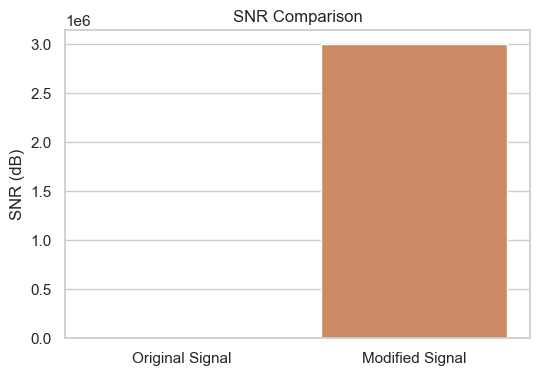

In [13]:
# Plot SNR comparison
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(x=["Original Signal", "Modified Signal"], y=[s_pow, diff_pow], ax=ax)
ax.set_ylabel("SNR (dB)")
ax.set_title("SNR Comparison")
plt.show()